# Dimensionality Reduction Methods

## Singular Value Decomposition

A linear algebra method that decomposes a matrix into three resultant matrices in order to reduce information redundancy and noise.

SVD is most commonly used for principal component analysis.

The anatomy of SVD:

**A = u x v x S**

- `A` = Original Matrix
- `u` = Left Orthogonal Matrix: holds important nonredundant information about *observation*
- `v` = Right Orthogonal Matrix: holds important nonredundant information on *features*
- `S` = Diagonal Matrix: contains all of the information about the decomposition processes performed during the compression.

Example:

| Name | Age | Income | Product | Price | Sale Status |
| - | - | - | - | - | - |
| Ron | 55 | $45,000 | Toothpaste | 4.29 | 1 |
| Tiffany | 72 | $15,000 | Shampoo | 5.99 | 0 |
| Jennifer | 47 | $65,000 | Hair Colour | 8.99 | 1 |

**Columns** - key factors that influences purchasing behaviour.  
**Rows** - probabilities that products will be purchased based on the key influencing factor.  

## Principal Component

Uncorrelated features that embody a dataset's important information (its "variance") with the redundancy, noise, and outliers stripped out

PCA Use Cases:

- Fraud Detection 
- Spam Detection
- Speech Recognition 
- Image Recognition 

Using Factors and Components:

- Both factors and components reprsent what is left of a dataset after information redundancy and noise is stripped out.
- Use them as input variables for machine learning algorithms to generate predictions from these compressed representations of your data.

## Principal Component Analysis (PCA)

In [4]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import pylab as plb 
from pylab import rcParams
import seaborn as sb 

from IPython.display import Image
from IPython.core.display import HTML 

import sklearn
from sklearn import datasets

In [5]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

### PCA on the iris data

In [9]:
iris = datasets.load_iris()
x = iris.data 
variable_names = iris.feature_names

x[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [12]:
# Cumulative
pca.explained_variance_ratio_.sum()

1.0

### Deciding what components to keep

- The *explained variance ratio* tells us how much information is compressed into the first few components
- When deciding how many components to keep, look at the percent of cumulative variance. Make sure to retain at least 70% of the dataset's original information.

In [13]:
# will take only first to components
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<AxesSubplot:>

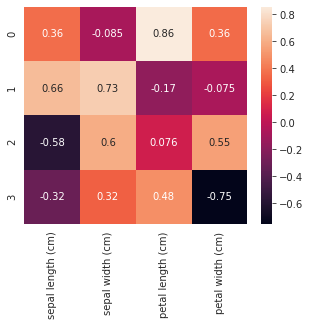

In [15]:
sb.heatmap(comps, annot=True)